In [1]:
import numpy as np

# Imports nécessaires pour construire un modèle LeNet 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Rescaling

# Pour importer le datasets
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Pour la compilation du modèle
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Pour visualiser les performances
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

print(tf.__version__)
tf.keras.backend.clear_session()
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Chargement du dataset
img_size = (224, 224)  # Taille cible
batch_size = 128

train_ds = image_dataset_from_directory(
    "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample",
    image_size=img_size,
    batch_size=batch_size,
    subset="training",
    validation_split=0.2,
    seed=42
)

val_ds = image_dataset_from_directory(
    "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample",
    image_size=img_size,
    batch_size=batch_size,
    subset="validation",
    validation_split=0.2,
    seed=42
)

2025-03-15 21:03:19.711922: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742068999.861327    1263 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742068999.905900    1263 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742069000.257558    1263 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742069000.257605    1263 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742069000.257607    1263 computation_placer.cc:177] computation placer alr

2.19.0
Num GPUs Available:  1
Found 6851 files belonging to 3 classes.
Using 5481 files for training.


I0000 00:00:1742069013.103190    1263 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 6851 files belonging to 3 classes.
Using 1370 files for validation.


## Définition des couches partagées

In [2]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

# Normalisation 
normalization_layer = Rescaling(1./255)

## Analyse de l'entrainement

In [3]:
def display_results(model_history, model_name):
    # Récupérer les données d'entraînement et de validation
    train_loss = model_history.history["loss"]
    val_loss = model_history.history["val_loss"]
    train_accuracy =  model_history.history["accuracy"]
    val_accuracy = model_history.history["val_accuracy"]
    
    plt.figure(figsize=(20, 8))
    
    # Tracer la perte
    plt.subplot(121)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title(model_name + ": Perte d'entraînement et de validation")
    plt.ylabel('Perte ')
    plt.xlabel('Époque')
    plt.legend(['Entraînement', 'Validation'], loc='best')
    
    # Tracer l'erreur absolue moyenne (MAE)
    plt.subplot(122)
    plt.plot(train_accuracy)
    plt.plot(val_accuracy)
    plt.title(model_name+': Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Époque')
    plt.legend(['Entraînement', 'Validation'], loc='best')
    
    plt.show()






## modèle MobileNetV2

Phase 1: Entraînement avec modèle de base gelé
Epoch 1/30


I0000 00:00:1742069120.135182    1547 cuda_dnn.cc:529] Loaded cuDNN version 90800


43/43 ━━━━━━━━━━━━━━━━━━━━ 34s 505ms/step - accuracy: 0.4319 - loss: 1.7808 - val_accuracy: 0.5803 - val_loss: 1.3413 - learning_rate: 0.0010
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 426ms/step - accuracy: 0.5405 - loss: 1.3280 - val_accuracy: 0.5825 - val_loss: 1.1769 - learning_rate: 0.0010
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 407ms/step - accuracy: 0.5836 - loss: 1.1831 - val_accuracy: 0.6307 - val_loss: 1.1098 - learning_rate: 0.0010
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 425ms/step - accuracy: 0.6012 - loss: 1.1113 - val_accuracy: 0.6175 - val_loss: 1.0366 - learning_rate: 0.0010
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 410ms/step - accuracy: 0.6149 - loss: 1.0506 - val_accuracy: 0.6117 - val_loss: 1.0096 - learning_rate: 0.0010
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 423ms/step - accuracy: 0.6168 - loss: 1.0204 - val_accuracy: 0.6015 - val_loss: 0.9967 - learning_rate: 0.0010
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 427ms/step - accuracy: 0.6246 - loss: 1.0007 - val_

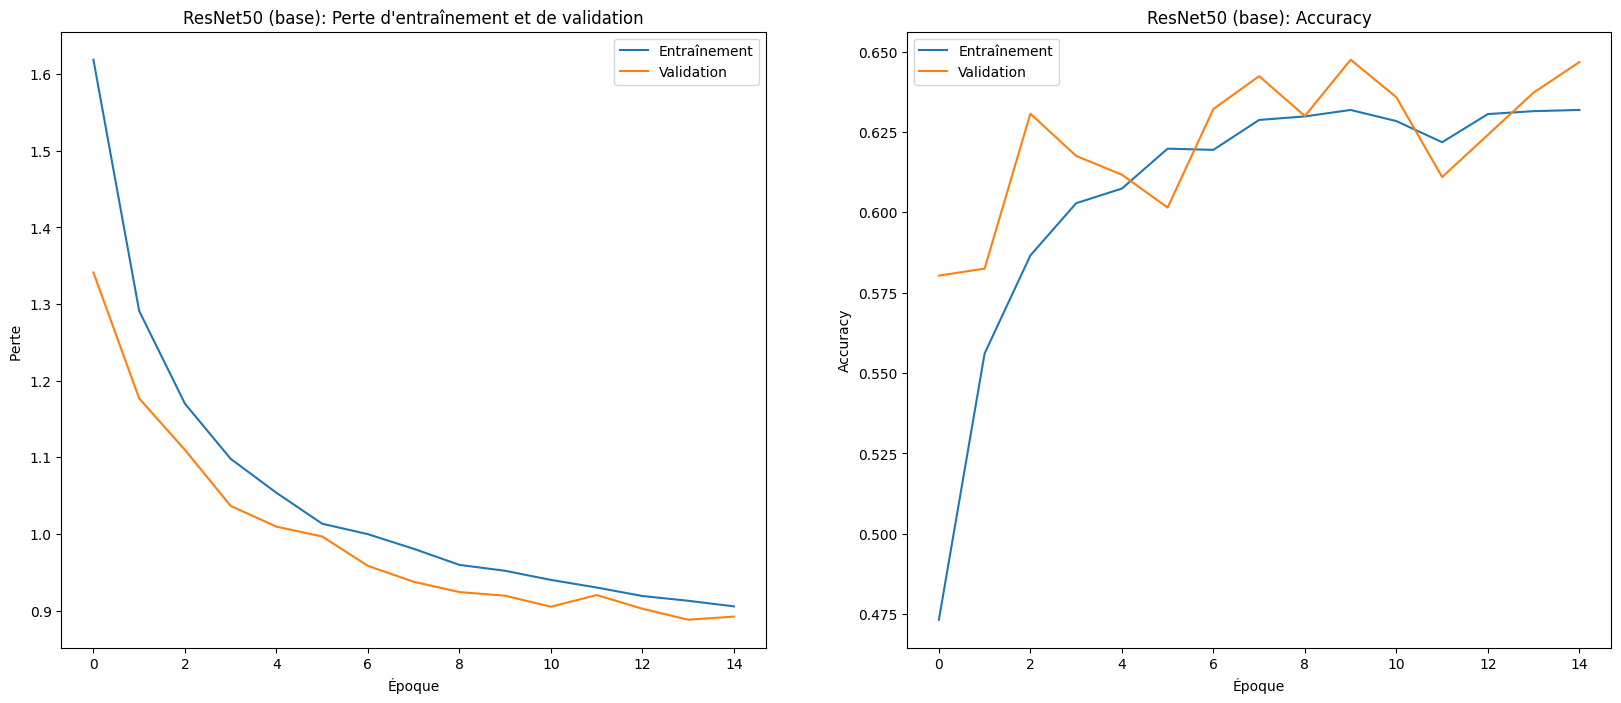

Analyse entraintement ResNet50 (fine tunning)
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 287ms/step - accuracy: 0.6805 - loss: 0.8192
Précision de validation finale: 0.6898


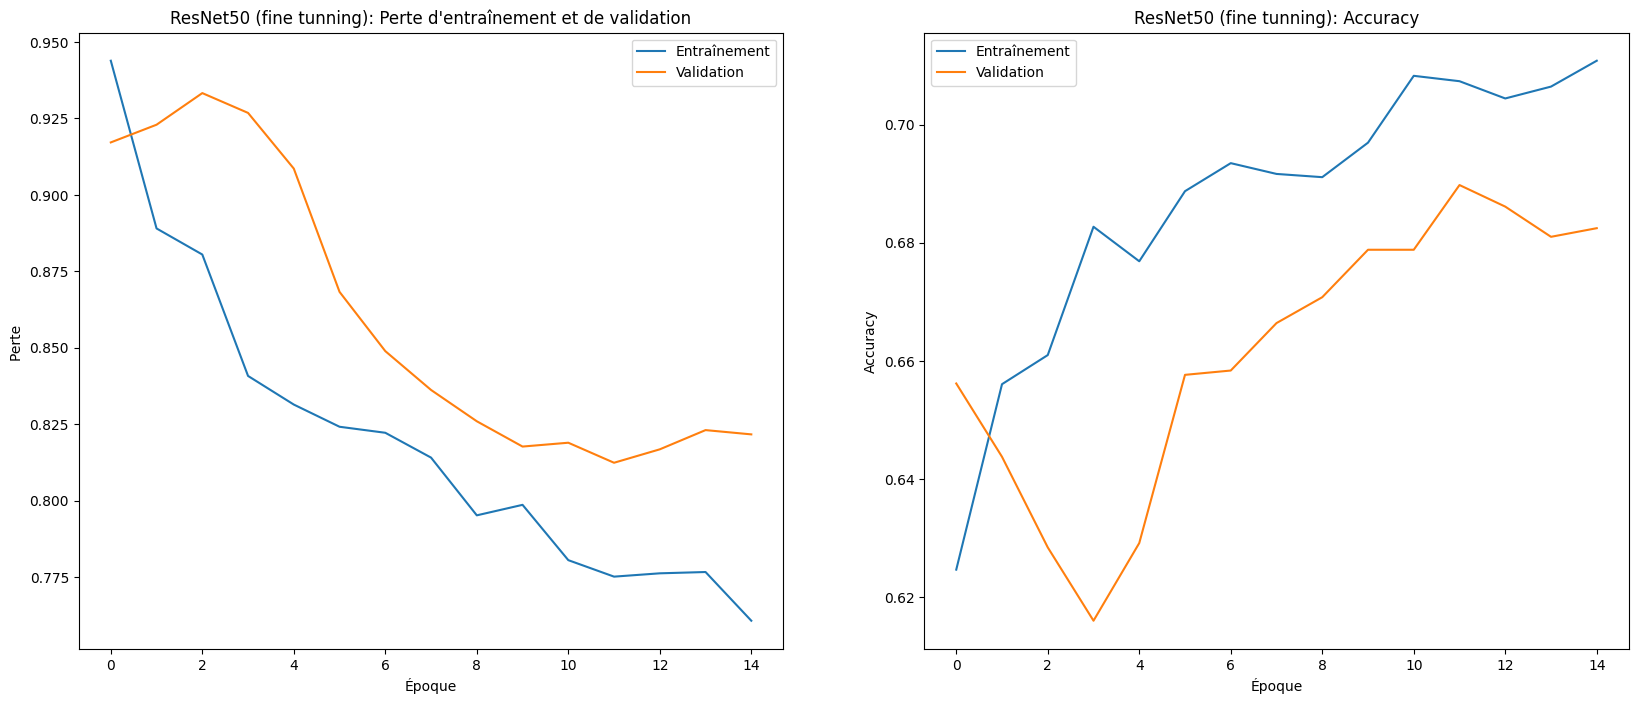

In [4]:
import tensorflow as tf 

# 1. Instancie le modèle pré-entrainé
base_model = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Geler le modèle de base


# 2. Construire le modèle complet
model = tf.keras.Sequential([
    # Augmentation de données
    data_augmentation,
    
    # Prétraitement spécifique au modèle
    tf.keras.layers.Rescaling(1./127.5, offset=-1),  # Pour MobileNetV2
    
    # Modèle de base
    base_model,
    
    # Couches de classification
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

# Étape 2: Entraîner avec le modèle de base gelé
print("Phase 1: Entraînement avec modèle de base gelé")

model.compile(
    loss='sparse_categorical_crossentropy',  
    optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3),                 
    metrics=['accuracy'])             

model_history = model.fit(train_ds,           
                           validation_data=val_ds,
                           epochs=30,
                           callbacks=[early_stopping, reduce_lr])    

# Étape 3: Fine-tuning - dégeler partiellement le modèle de base
print("Phase 2: Fine-tuning")

# Dégeler les dernières couches du modèle de base
base_model.trainable = True

# Geler toutes les couches sauf les 20 dernières
fine_tune_at = len(base_model.layers) - 20
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompiler avec un taux d'apprentissage plus faible
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),  
    metrics=['accuracy']
)

# Learning rate scheduler
import math

def lr_scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * math.exp(-0.1)  

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Entraîner avec fine-tuning
history_phase2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=[early_stopping, lr_callback]
)


# Analyse de l'entainement
print("Analyse entraintement ResNet50 (base)")
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Précision de validation finale: {val_accuracy:.4f}")
display_results(model_history, "ResNet50 (base)")

# Analyse de l'entainement
print("Analyse entraintement ResNet50 (fine tunning)")
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Précision de validation finale: {val_accuracy:.4f}")
display_results(history_phase2, "ResNet50 (fine tunning)")